# LetsGrowMore (LGMVIP) - "DATA SCIENCE INTERNSHIP"

## LGMVIP July-22

### _Author - Zecil Jain_

### Task - 8 Next Word Prediction

In this project we will be using Tensorflow and Keras library to train a RNN model and using that model we will predict the next word in the text from the dataset.

Dataset Link: https://drive.google.com/file/d/1GeUzNVqiixXHnTl8oNiQ2W3CynX_lsu2/view

## Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential, load_model
from keras.layers import LSTM
from keras.layers.core import Dense, Activation
from tensorflow.keras.optimizers import RMSprop
import tensorflow_addons as tfa
import matplotlib.pyplot as plt
import pickle
import heapq

np.random.seed(42)

import warnings
warnings.filterwarnings("ignore")

## Loading the Dataset

We will be loading the dataset in the 'txt' variable.

In [2]:
path = '1661-0.txt'
txt = open(path, encoding='utf-8').read().lower()
print('corpus length', len(txt))

corpus length 581888


Now the next process will be performing the feature engineering in our data. For this purpose, we will require a dictionary with each word in the data within the list of unique words as the key, and it’s significant portions as value.

In [3]:
chars = sorted(list(set(txt)))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))
print ("unique chars: ",len(chars))

unique chars:  73


## Feature Engineering

Here we will define a sequence length which will represent the number of previous words in the sequence that will determine our next word. We will also space the sequences by 3 characters. And we will additionally store the next character (the one we need to predict) for every sequence.

In [4]:
SEQUENCE_LENGTH = 39
step = 3
sentences = []
next_chars = []
for i in range(0, len(txt) - SEQUENCE_LENGTH, step):
    sentences.append(txt[i:i+SEQUENCE_LENGTH])
    next_chars.append(txt[i+SEQUENCE_LENGTH])
print ('num training examples: ',len(sentences))

num training examples:  193950


Now we will create two numpy arrays x for storing the features and y for storing its corresponding label. We will also iterate x and y if the word is available so that the corresponding position becomes 1.

In [5]:
X = np.zeros((len(sentences), SEQUENCE_LENGTH, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

Now before moving forward, have a look at a single sequence of words:

In [6]:
print(X[0][0])

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True]


## Model Building

As we stated earlier, we will use the ___Recurrent Neural networks___ for next word prediction model. Here we will use the __LSTM model__, which is a very powerful RNN.

In [7]:
model = Sequential();
model.add(LSTM(128, input_shape=(SEQUENCE_LENGTH, len(chars))))
model.add(Dense(len(chars)))
model.add(Activation('softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               103424    
                                                                 
 dense (Dense)               (None, 73)                9417      
                                                                 
 activation (Activation)     (None, 73)                0         
                                                                 
Total params: 112,841
Trainable params: 112,841
Non-trainable params: 0
_________________________________________________________________


## Model Training

Here we will be training the next word prediction model with 20 epochs. The model training uses RMSprop as the optimizer with a learning rate of 0.01 and uses categorical cross-entropy for loss function. With a batch size of 128 and a split of 0.5, we train our model:

In [9]:
optimizer = RMSprop(lr= 0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, y, validation_split=0.05, batch_size=128, epochs=20, shuffle=True).history

Epoch 1/20
1440/1440 [==============================] - 247s 167ms/step - loss: 1.9399 - accuracy: 0.4284 - val_loss: 2.1276 - val_accuracy: 0.4070
Epoch 2/20
1440/1440 [==============================] - 205s 142ms/step - loss: 1.6026 - accuracy: 0.5199 - val_loss: 2.0843 - val_accuracy: 0.4400
Epoch 3/20
1440/1440 [==============================] - 233s 162ms/step - loss: 1.5082 - accuracy: 0.5447 - val_loss: 2.0521 - val_accuracy: 0.4496
Epoch 4/20
1440/1440 [==============================] - 231s 161ms/step - loss: 1.4553 - accuracy: 0.5589 - val_loss: 2.0395 - val_accuracy: 0.4560
Epoch 5/20
1440/1440 [==============================] - 214s 149ms/step - loss: 1.4195 - accuracy: 0.5695 - val_loss: 2.0481 - val_accuracy: 0.4608
Epoch 6/20
1440/1440 [==============================] - 207s 144ms/step - loss: 1.3937 - accuracy: 0.5759 - val_loss: 2.0424 - val_accuracy: 0.4630
Epoch 7/20
1440/1440 [==============================] - 208s 145ms/step - loss: 1.3728 - accuracy: 0.5807 - val_

We have successfully trained our model and the final accuracy in the training stage that we got is __60.74%__ which is pretty acceptable considering we haven't even fully configured neither our model nor the dataset to their full potential.

## Saving the Trained Model

Now we have successfully trained our model, before moving forward to evaluating our model, it will be better to save this model for our future use.

In [10]:
model.save('LGMVIP_Task8_model.h5')
pickle.dump(history, open("history.p", "wb"))
model = load_model('LGMVIP_Task8_model.h5')
history = pickle.load(open("history.p", "rb"))

## Evaluating the Next Word Prediction Model

Now let’s have a quick look at how our model is going to behave based on its accuracy and loss changes while training:

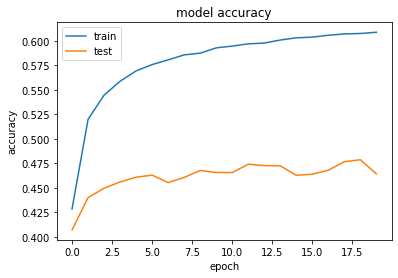

In [11]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig("Task8_Accuracy.png")

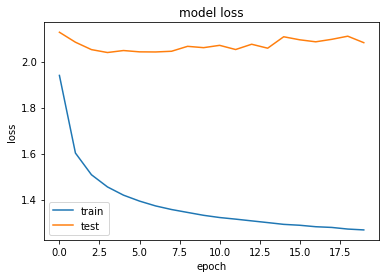

In [12]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc= 'best')
plt.savefig("Task8_Loss.png")

## Testing Next Word Prediction Model

Now let’s build a python program to predict the next word using our trained model. For this, we will define some essential functions that will be used in the process.

In [13]:
def prepare_input(text):
    x = np.zeros((1, SEQUENCE_LENGTH, len(chars)))
    for t, char in enumerate(text):
        x[0, t, char_indices[char]] = 1
    return x

The sequences must be 40 chars long and the tensor is of the shape (1, 40, 57)

### The Sample function

This function allows us to ask our model what are the next probable characters (The heap simplifies the job)

In [14]:
def sample(preds, top_n = 3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    return heapq.nlargest(top_n, range(len(preds)), preds.take)

### Prediction function

In [15]:
def predict_completion(text):
    original_text = text
    generalised = text
    completion = ''
    while True:
        x = prepare_input(text)
        preds = model.predict(x, verbose=0)[0]
        next_index = sample(preds, top_n=1)[0]
        next_char = indices_char[next_index]
    text = txt[1:] + next_char
    completion += next_char
    if len(original_text + completion) + 2 > len(original_text) and next_char == ' ':
                return completion

This function is created to predict the next word until space is generated. It will do this by iterating the input, which will ask our RNN model and extract instances from it. Now we will modify the above function to predict multiple characters:

### Prediction of multiple completions

In [16]:
def predict_completions(text, n = 3):
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [indices_char[idx] + predict_completion(text[1:] + indices_char[idx]) for idx in next_indices]

Now we will use the sequence of 40 characters that we can use as a base for our predictions.

In [17]:
# Sample Test case
quotes = [
    "It is not a lack of love, but a lack of friendship that makes unhappy marriages.",
    "That which does not kill us makes us stronger.",
    "I'm not upset that you lied to me, I'm upset that from now on I can't believe you.",
    "And those who were seen dancing were thought to be insane by those who could not hear the music.",
    "It is hard enough to remember my opinions, without also remembering my reasons for them!"
]

Now finally, we can use the model to predict the next word:

In [ ]:
for q in quotes:
    seq = q[:SEQUENCE_LENGTH].lower()
    print (seq)
    print (predict_completions(seq, 5))
    print ()

it is not a lack of love, but a lack of


The model developed is reliable and efficient enough to be used in realtime scenarios for making predictions using unseen datasets to get the desired results. Hence the project of creating a model for "Next Word Predictions" has been successfully completed.

__Note__: The model requires Tensorflow to work with CUDA which is only supported by NVIDIA GPUs. Since the system on which this project was developed had AMD powered GPU, making predictions was not a possibility but the model is reliable enough to be tested elsewhere in systems having all necessary requirements to support the process.